In [ ]:
!pip show pandas

In [ ]:
!pip show numpy

In [ ]:
!pip show plotnine

In [ ]:
pip install plotnine

In [ ]:
!pip show folium

In [ ]:
pip install folium

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from plotnine import *
import re

# 지도 표현을 위해
import folium

In [3]:
park = pd.read_csv('park_standard.csv', encoding='euc-kr')

In [4]:
park.shape

(18870, 19)

In [5]:
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,42790-00004,화천 어린이공원1,어린이공원,강원도 화천군 화천읍 아리 256-1번지 일원,강원도 화천군 화천읍 아리 256-1번지 일원,38.105568,127.707075,1048.0,NaN,"그네, 미끄럼틀등",NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군
1,42790-00004,화천 어린이공원3,어린이공원,강원도 화천군 산수화로5길 24-5,강원도 화천군 화천읍 중리 191-25번지 일원,38.108973,127.708868,1760.0,NaN,NaN,NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군
2,42790-00004,화천 어린이공원4,어린이공원,강원도 화천군 산천어길 206,강원도 화천군 화천읍 신읍리 658-4번지 일원,38.114549,127.702736,1511.0,NaN,NaN,NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군
3,42790-00008,화천 어린이공원8,어린이공원,강원도 화천군 산수화로8,강원도 화천군 화천읍 아리 244-10번지 일원,38.106931,127.706165,752.0,NaN,NaN,NaN,NaN,NaN,2010-08-27,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군
4,42790-00008,사내 어린이공원,어린이공원,강원도 화천군 사내면 사창리 969-4번지 일원,강원도 화천군 사내면 사창리 969-4번지 일원,38.069006,127.523321,1385.0,NaN,"그네, 미끄럼틀등",NaN,NaN,NaN,1998-12-14,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군


In [6]:
park.tail()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
18865,28140-00009,송림4공원,어린이공원,NaN,인천광역시 동구 송림동 291-6,37.478715,126.653257,412.9,NaN,야외무대,NaN,NaN,"조형파고라, 앉음벽",1998-07-20,인천광역시 동구청,032-770-6205,2019-07-30,3500000,인천광역시 동구
18866,47760-00002,서부공원,근린공원,NaN,경상북도 영양군 영양읍 서부리 123,36.660456,129.114953,56045.0,NaN,NaN,화장실,NaN,NaN,1973-03-02,경상북도 영양군청,054-680-6340,2019-09-05,5170000,경상북도 영양군
18867,47760-00003,입암공원,근린공원,NaN,경상북도 영양군 입암면 신구리 산27-5,36.594802,129.093007,109262.0,NaN,NaN,NaN,NaN,NaN,1977-06-29,경상북도 영양군청,054-680-6340,2019-09-05,5170000,경상북도 영양군
18868,47760-00004,수비공원,근린공원,NaN,경상북도 영양군 수비면 발리리 산48,36.761440,129.200011,67159.0,NaN,NaN,NaN,NaN,NaN,1978-02-14,경상북도 영양군청,054-680-6340,2019-09-05,5170000,경상북도 영양군
18869,47760-00005,삼지연꽃 테마파크,수변공원,NaN,경상북도 영양군 영양읍 삼지리 200,36.662816,129.129372,380000.0,NaN,NaN,화장실,NaN,체험장,2009-11-19,경상북도 영양군청,054-680-6340,2019-09-05,5170000,경상북도 영양군


In [7]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [8]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18870 entries, 0 to 18869
Data columns (total 19 columns):
관리번호            18870 non-null object
공원명             18870 non-null object
공원구분            18870 non-null object
소재지도로명주소        8742 non-null object
소재지지번주소         17751 non-null object
위도              18870 non-null float64
경도              18870 non-null float64
공원면적            18870 non-null float64
공원보유시설(운동시설)    5005 non-null object
공원보유시설(유희시설)    7345 non-null object
공원보유시설(편익시설)    5508 non-null object
공원보유시설(교양시설)    1240 non-null object
공원보유시설(기타시설)    3218 non-null object
지정고시일           15913 non-null object
관리기관명           18116 non-null object
전화번호            17680 non-null object
데이터기준일자         18870 non-null object
제공기관코드          18870 non-null object
제공기관명           18870 non-null object
dtypes: float64(3), object(16)
memory usage: 2.7+ MB


In [9]:
#결측치 검색

park.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10128
소재지지번주소          1119
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13865
공원보유시설(유희시설)    11525
공원보유시설(편익시설)    13362
공원보유시설(교양시설)    17630
공원보유시설(기타시설)    15652
지정고시일            2957
관리기관명             754
전화번호             1190
데이터기준일자             0
제공기관코드              0
제공기관명               0
dtype: int64

In [10]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


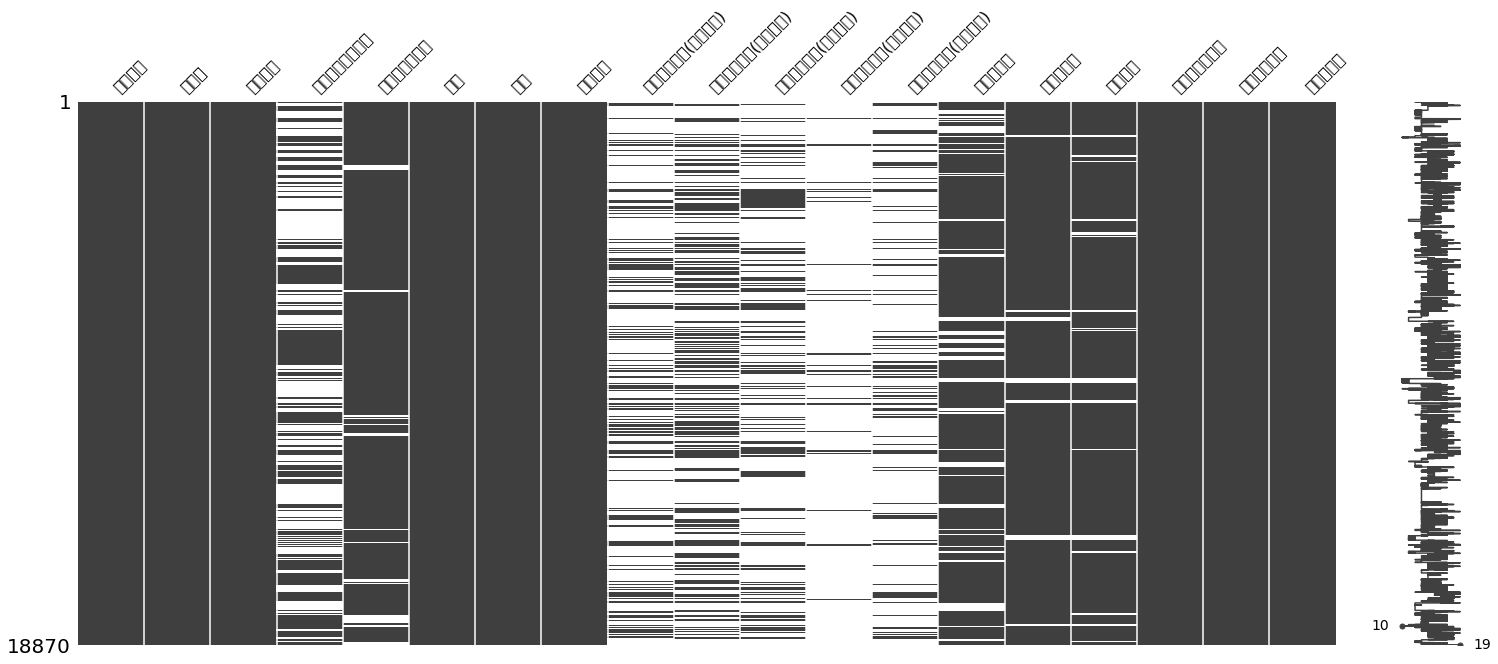

In [11]:
import missingno as msno

msno.matrix(park)

In [12]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [13]:
park.drop?

In [14]:
park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명','전화번호', '데이터기준일자', '제공기관코드', '제공기관명'], inplace=True)

In [15]:
park.shape

(18870, 8)

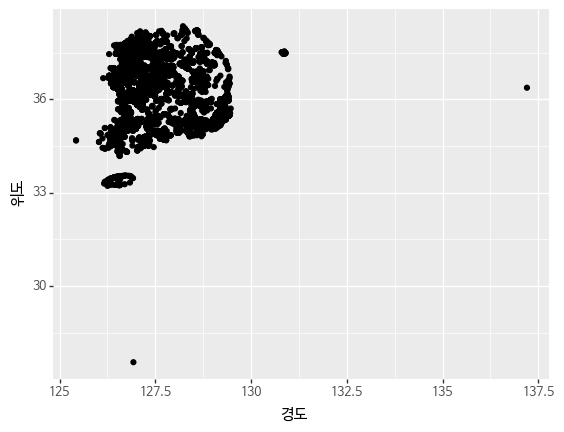

<ggplot: (-9223371917463601036)>

In [16]:
(ggplot(park)+aes(x='경도', y='위도')+geom_point()+theme(text=element_text(family='NanumBarunGothic')))

In [ ]:
# 데이터 전처리 
## 시도 결측치 처리
  ### 다른 데이터로 대체
  ### 도로명 혹은 지번 둘 중 하나만 있으면 있는 데이터로 대체
  
## 아웃라이어 데이터 제거 혹은 대체
  ### 위경도가 국내 범위를 벗어나는 데이터의 경우 제외하고 그리도록 처리

In [17]:
park.dtypes

관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
dtype: object

In [ ]:
# park['공원면적'] = park['공원면적'].str.replace(',','').astype(float)
# park['공원면적'].head()

In [18]:
park['공원면적'].head()

0    1048.0
1    1760.0
2    1511.0
3     752.0
4    1385.0
Name: 공원면적, dtype: float64

In [19]:
park['공원면적비율'] = park['공원면적'].apply(lambda x : np.sqrt(x)*0.01)
park['공원면적비율'].head()

0    0.323728
1    0.419524
2    0.388716
3    0.274226
4    0.372156
Name: 공원면적비율, dtype: float64

In [20]:
# 도로명 주소의 널값 수 

park['소재지도로명주소'].isnull().sum()

10128

In [21]:
# 지번 주소의 널값 수 
park['소재지지번주소'].isnull().sum()

1119

In [22]:
park.loc[(park['소재지도로명주소'].isnull())&(park['소재지지번주소'].notnull())].shape

(10128, 9)

In [23]:
park['소재지도로명주소'].fillna(park['소재지지번주소'], inplace = True)

In [24]:
park['소재지도로명주소'].isnull().sum()

0

In [25]:
park_loc = park.loc[(park['소재지도로명주소'].isnull())&(park['소재지지번주소'].notnull())]
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율
0,42790-00004,화천 어린이공원1,어린이공원,강원도 화천군 화천읍 아리 256-1번지 일원,강원도 화천군 화천읍 아리 256-1번지 일원,38.105568,127.707075,1048.0,0.323728
1,42790-00004,화천 어린이공원3,어린이공원,강원도 화천군 산수화로5길 24-5,강원도 화천군 화천읍 중리 191-25번지 일원,38.108973,127.708868,1760.0,0.419524
2,42790-00004,화천 어린이공원4,어린이공원,강원도 화천군 산천어길 206,강원도 화천군 화천읍 신읍리 658-4번지 일원,38.114549,127.702736,1511.0,0.388716
3,42790-00008,화천 어린이공원8,어린이공원,강원도 화천군 산수화로8,강원도 화천군 화천읍 아리 244-10번지 일원,38.106931,127.706165,752.0,0.274226
4,42790-00008,사내 어린이공원,어린이공원,강원도 화천군 사내면 사창리 969-4번지 일원,강원도 화천군 사내면 사창리 969-4번지 일원,38.069006,127.523321,1385.0,0.372156


In [26]:
park['시도'] = park['소재지도로명주소'].str.split(' ', expand=True)[0]
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율,시도
0,42790-00004,화천 어린이공원1,어린이공원,강원도 화천군 화천읍 아리 256-1번지 일원,강원도 화천군 화천읍 아리 256-1번지 일원,38.105568,127.707075,1048.0,0.323728,강원도
1,42790-00004,화천 어린이공원3,어린이공원,강원도 화천군 산수화로5길 24-5,강원도 화천군 화천읍 중리 191-25번지 일원,38.108973,127.708868,1760.0,0.419524,강원도
2,42790-00004,화천 어린이공원4,어린이공원,강원도 화천군 산천어길 206,강원도 화천군 화천읍 신읍리 658-4번지 일원,38.114549,127.702736,1511.0,0.388716,강원도
3,42790-00008,화천 어린이공원8,어린이공원,강원도 화천군 산수화로8,강원도 화천군 화천읍 아리 244-10번지 일원,38.106931,127.706165,752.0,0.274226,강원도
4,42790-00008,사내 어린이공원,어린이공원,강원도 화천군 사내면 사창리 969-4번지 일원,강원도 화천군 사내면 사창리 969-4번지 일원,38.069006,127.523321,1385.0,0.372156,강원도


In [27]:
park['군구'] = park['소재지도로명주소'].str.split(' ', expand=True)[1]
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율,시도,군구
0,42790-00004,화천 어린이공원1,어린이공원,강원도 화천군 화천읍 아리 256-1번지 일원,강원도 화천군 화천읍 아리 256-1번지 일원,38.105568,127.707075,1048.0,0.323728,강원도,화천군
1,42790-00004,화천 어린이공원3,어린이공원,강원도 화천군 산수화로5길 24-5,강원도 화천군 화천읍 중리 191-25번지 일원,38.108973,127.708868,1760.0,0.419524,강원도,화천군
2,42790-00004,화천 어린이공원4,어린이공원,강원도 화천군 산천어길 206,강원도 화천군 화천읍 신읍리 658-4번지 일원,38.114549,127.702736,1511.0,0.388716,강원도,화천군
3,42790-00008,화천 어린이공원8,어린이공원,강원도 화천군 산수화로8,강원도 화천군 화천읍 아리 244-10번지 일원,38.106931,127.706165,752.0,0.274226,강원도,화천군
4,42790-00008,사내 어린이공원,어린이공원,강원도 화천군 사내면 사창리 969-4번지 일원,강원도 화천군 사내면 사창리 969-4번지 일원,38.069006,127.523321,1385.0,0.372156,강원도,화천군


In [28]:
park.describe()

,위도,경도,공원면적,공원면적비율
count,18870.000000,18870.000000,1.887000e+04,18870.000000
mean,36.357038,127.536231,3.898528e+04,1.045744
std,1.062079,0.879728,2.216855e+05,1.674842
min,27.551606,125.430955,0.000000e+00,0.000000
25%,35.278095,126.883712,1.503900e+03,0.387801
50%,36.393152,127.131772,2.177150e+03,0.466599
75%,37.412262,128.407786,1.030475e+04,1.015123
max,38.350990,137.202661,8.703000e+06,29.500847


In [35]:
park[['위도','경도']].describe()

,위도,경도
count,18870.000000,18870.000000
mean,36.357038,127.536231
std,1.062079,0.879728
min,27.551606,125.430955
25%,35.278095,126.883712
50%,36.393152,127.131772
75%,37.412262,128.407786
max,38.350990,137.202661


In [36]:
# 위 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력해 봅니다.
# 좀 더 정확하게 출력하려면 대한민국 위경도 데이터 범위를 다시 넣어줍니다. 
park_loc_notnull = park.loc[(park['위도'] > 32 ) & (park['경도'] < 132) & park['시도'].notnull()]
park_loc_notnull.shape


(18868, 12)

In [37]:
# 위경도가 잘못입력된 데이터를 봅니다.
# 주소가 잘못되지는 않았습니다.
# 주소를 통해 위경도를 다시 받아올 필요가 있습니다.
park.loc[(park['위도'] < 26 ) | (park['경도'] >= 132)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율,시도,군구,구군
13669,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,1.823678,충청북도,청주시,청주시


In [38]:
park_loc_notnull['시도'].value_counts()

경기도        3703
전라남도       2047
경상남도       1825
서울특별시      1778
충청남도       1723
전라북도       1137
충청북도        914
경상북도        913
울산광역시       887
강원도         736
인천광역시       724
부산광역시       652
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

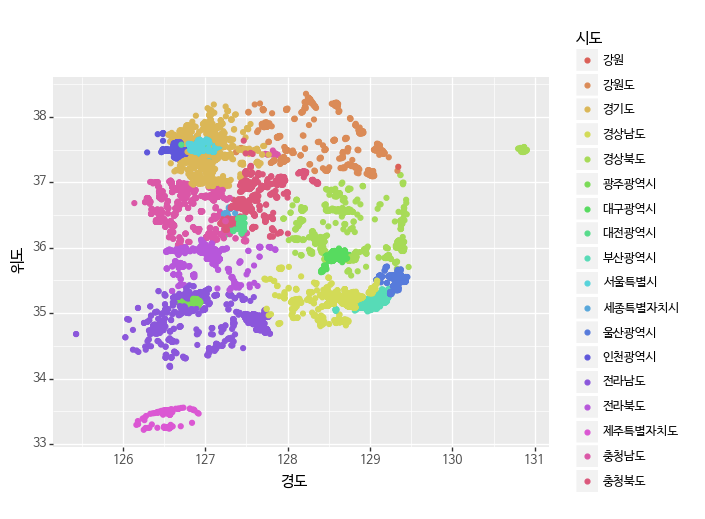

<ggplot: (-9223371917457863687)>

In [39]:
(ggplot(park_loc_notnull)
 + aes(x='경도', y='위도', color='시도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

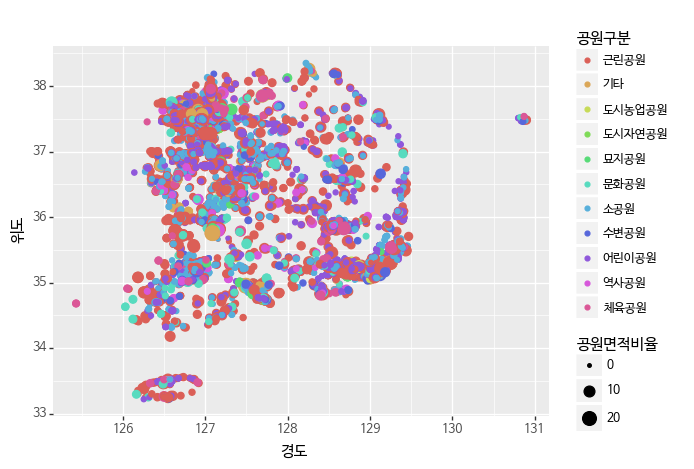

<ggplot: (119396538586)>

In [40]:

# 전국적으로 어린이 공원이 가장 많은 것으로 보입니다.
# 제주도는 한라산 아래 해안선과 유사한 모습으로 공원이 배치되어 있는 모습이 인상적입니다.
(ggplot(park_loc_notnull)
 + aes(x='경도', y='위도', color='공원구분', size='공원면적비율')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

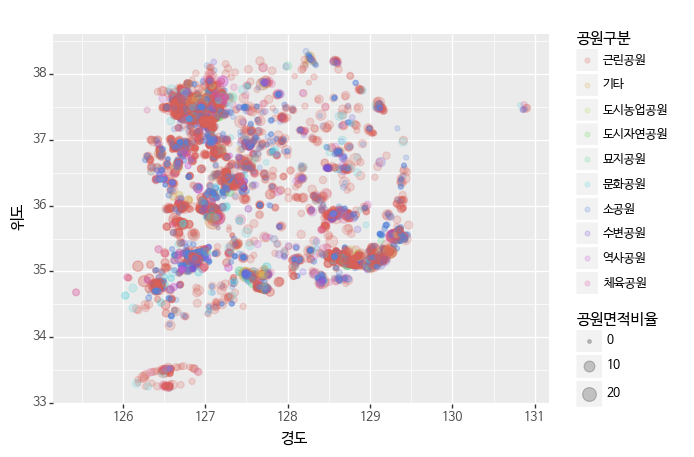

<ggplot: (-9223371917457772137)>

In [41]:

# 어린이공원을 제외하고 찍어보도록 합니다.
# 다음으로 많은 근린공원과 소공원이 많이 보입니다.
(ggplot(park_loc_notnull.loc[park_loc_notnull['공원구분'] != '어린이공원'])
 + aes(x='경도', y='위도', color='공원구분', size='공원면적비율')
 + geom_point(alpha=0.2)
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [42]:
park_loc_notnull.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율,시도,군구,구군
0,42790-00004,화천 어린이공원1,어린이공원,강원도 화천군 화천읍 아리 256-1번지 일원,강원도 화천군 화천읍 아리 256-1번지 일원,38.105568,127.707075,1048.0,0.323728,강원도,화천군,화천군
1,42790-00004,화천 어린이공원3,어린이공원,강원도 화천군 산수화로5길 24-5,강원도 화천군 화천읍 중리 191-25번지 일원,38.108973,127.708868,1760.0,0.419524,강원도,화천군,화천군
2,42790-00004,화천 어린이공원4,어린이공원,강원도 화천군 산천어길 206,강원도 화천군 화천읍 신읍리 658-4번지 일원,38.114549,127.702736,1511.0,0.388716,강원도,화천군,화천군
3,42790-00008,화천 어린이공원8,어린이공원,강원도 화천군 산수화로8,강원도 화천군 화천읍 아리 244-10번지 일원,38.106931,127.706165,752.0,0.274226,강원도,화천군,화천군
4,42790-00008,사내 어린이공원,어린이공원,강원도 화천군 사내면 사창리 969-4번지 일원,강원도 화천군 사내면 사창리 969-4번지 일원,38.069006,127.523321,1385.0,0.372156,강원도,화천군,화천군


In [43]:
# 시도별로 합계 데이터를 출력
park_do = pd.DataFrame(park['시도'].value_counts())
park_do_normalize = pd.DataFrame(park['시도'].value_counts(normalize=True))
park_sido = park_do.merge(park_do_normalize, left_index=True, right_index=True).reset_index()
park_sido.columns = ['시도', '합계', '비율']
park_sido.sort_values(by=['합계'], ascending=False)
park_sido

,시도,합계,비율
0,경기도,3703,0.196237
1,전라남도,2047,0.108479
2,경상남도,1825,0.096714
3,서울특별시,1779,0.094277
4,충청남도,1723,0.091309
5,전라북도,1137,0.060254
6,충청북도,915,0.048490
7,경상북도,913,0.048384
8,울산광역시,887,0.047006
9,강원도,736,0.039004


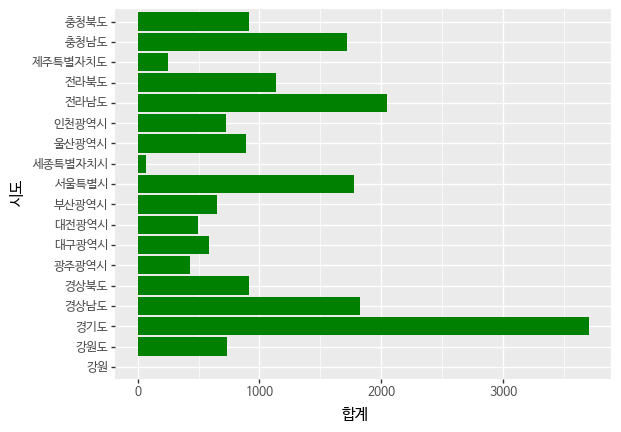

<ggplot: (-9223371917458899561)>

In [44]:
# 경기도가 압도적으로 많음
(ggplot(park_sido.sort_values(by=['합계'], ascending=False))
 + aes(x='시도', y='합계')
 + geom_bar(stat='identity', position='dodge', fill='green')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [45]:

park_type = park['공원구분'].value_counts().reset_index()
park_type.columns = ('공원구분', '합계')
park_type

,공원구분,합계
0,어린이공원,10391
1,근린공원,4350
2,소공원,2749
3,문화공원,325
4,수변공원,304
5,기타,268
6,체육공원,244
7,역사공원,173
8,묘지공원,46
9,도시농업공원,13


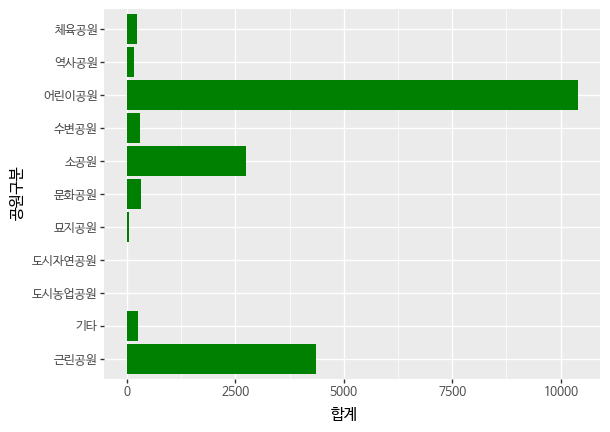

<ggplot: (119396716173)>

In [46]:

(ggplot(park_type)
 + aes(x='공원구분', y='합계')
 + geom_bar(stat='identity', position='dodge', fill='green')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [47]:

gg = park.loc[park['시도'] == '경기도']
gg.shape

(3703, 12)

In [48]:

gg_park = gg['공원구분'].value_counts().reset_index()
gg_park.columns = ('공원구분', '합계')
gg_park

,공원구분,합계
0,어린이공원,2064
1,근린공원,907
2,소공원,428
3,문화공원,90
4,체육공원,84
5,수변공원,59
6,역사공원,37
7,기타,17
8,묘지공원,10
9,도시자연공원,6


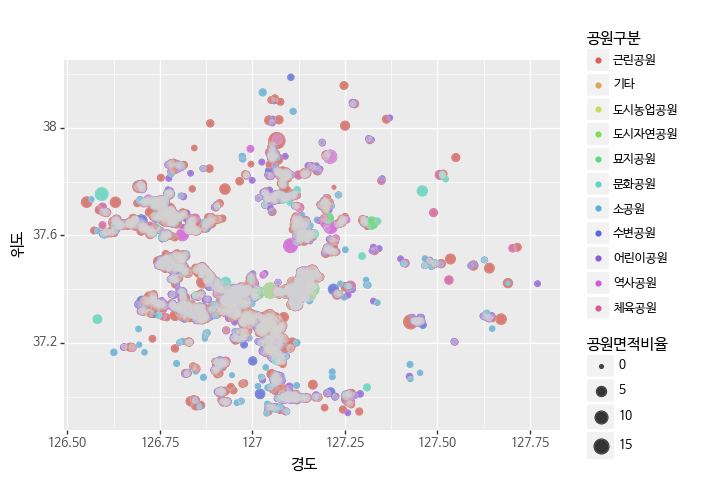

<ggplot: (-9223371917457812890)>

In [49]:
(ggplot(gg)
 + aes(x='경도', y='위도', color='공원구분', size='공원면적비율') 
 + geom_point()
 + geom_jitter(color='lightgray', alpha=0.25)
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [50]:
gg_suwon = gg.loc[gg['구군'] == '수원시']

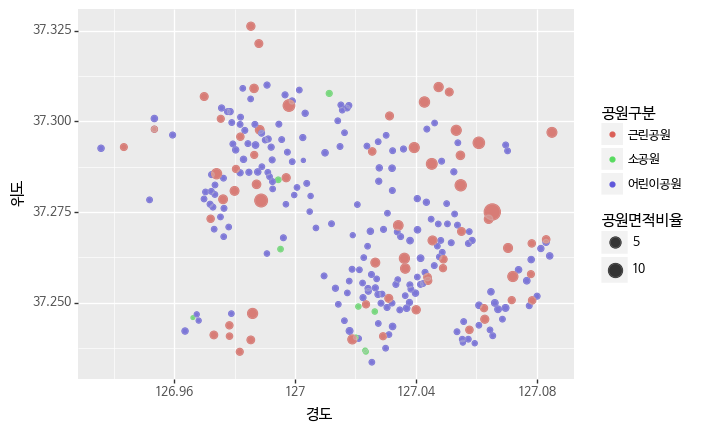

<ggplot: (119396732203)>

In [51]:
(ggplot(gg_suwon)
 + aes(x='경도', y='위도', color='공원구분', size='공원면적비율') 
 + geom_point()
 + geom_jitter(color='lightgray', alpha=0.25)
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [52]:

geo_df = gg_suwon
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=13)

for n in geo_df.index:
    park_name = geo_df.loc[n, '공원명'] + '-' + geo_df.loc[n, '소재지도로명주소']
    icon_color = 'blue'
    folium.CircleMarker(
        location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
        radius=geo_df['공원면적비율'][n],
        popup=park_name,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)
    
map

In [53]:
park_type = r'.*((역사|체육|수변|문화|묘지)공원).*'
gg_sample = gg.loc[gg['공원구분'].str.match(park_type)]

In [54]:
gg_sample.shape

(280, 12)

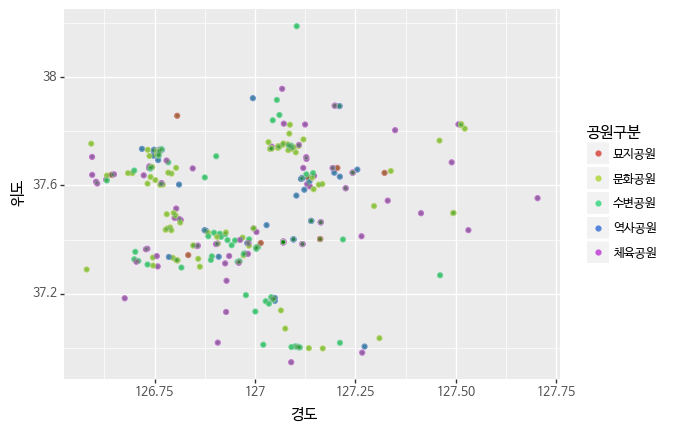

<ggplot: (-9223371917458049599)>

In [55]:
(ggplot(gg_sample)
 + aes(x='경도', y='위도', color='공원구분') 
 + geom_point()
 + geom_jitter(fill='green', color='lightgray', alpha=0.25)
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [56]:

gg_sample.head(3)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율,시도,군구,구군
1424,41500-00003,수변공원,수변공원,경기도 이천시 경충대로 2422번길 17,경기도 이천시 진리동 148,37.268120,127.460527,12040.0,1.097269,경기도,이천시,이천시
2019,41210-00081,충현역사공원,역사공원,경기도 광명시 소하동 1068-3,경기도 광명시 소하동 1068-3,37.432106,126.878330,7352.0,0.857438,경기도,광명시,광명시
2020,41210-00082,기형도문화공원,문화공원,경기도 광명시 일직동 산20-2외,경기도 광명시 일직동 산20-2외,37.426066,126.882548,50011.0,2.236314,경기도,광명시,광명시


In [57]:
# 경기도 일부 공원만 지도에 표기
geo_df = gg_sample

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=11)

for n in geo_df.index:
    park_name = geo_df.loc[n, '공원명'] + ' - ' + geo_df.loc[n, '소재지도로명주소']
    folium.Marker([geo_df.loc[n, '위도'], geo_df.loc[n, '경도']], popup=park_name).add_to(map)
    
map

In [58]:

seoul = park[park['시도'] == '서울특별시']
seoul.shape

(1779, 12)

In [59]:
seoul.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율,시도,군구,구군
15,11110-00030,창신공원,어린이공원,서울특별시 종로구 창신 23-362,서울특별시 종로구 창신 23-362,37.578276,127.012931,710.0,0.266458,서울특별시,종로구,종로구
16,11110-00031,당고개공원,어린이공원,서울특별시 종로구 창신 23-350,서울특별시 종로구 창신 23-350,37.575762,127.012382,860.0,0.293258,서울특별시,종로구,종로구
17,11110-00032,무악공원,어린이공원,서울특별시 종로구 무악동 산2-83,서울특별시 종로구 무악동 산2-83,37.577525,126.960547,5136.0,0.716659,서울특별시,종로구,종로구
18,11110-00033,창덕공원,근린공원,서울특별시 종로구 율곡로 99 (와룡동),서울특별시 종로구 와룡동 2-71,37.580274,126.991785,491328.0,7.009479,서울특별시,종로구,종로구
19,11110-00034,청진공원,근린공원,서울특별시 종로구 종로3길 24-29 (청진동),서울특별시 종로구 청진동 177,37.571796,126.979991,3341.0,0.578014,서울특별시,종로구,종로구


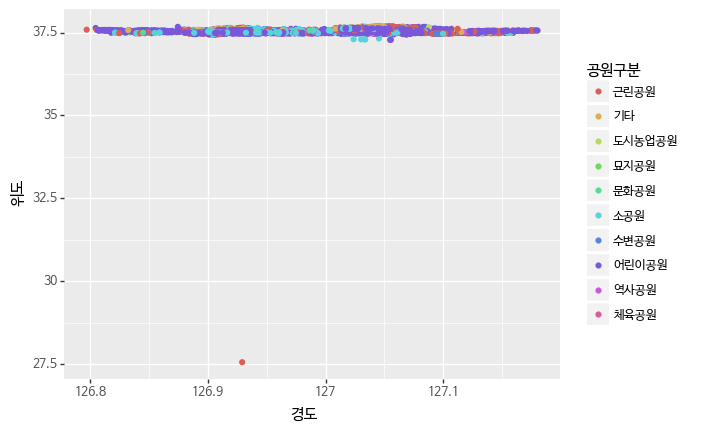

<ggplot: (-9223371917457790755)>

In [60]:

(ggplot(seoul)
 + aes(x='경도', y='위도', color='공원구분') 
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [61]:
seoul[seoul["경도"] > 127.4]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율,시도,군구,구군


In [62]:

seoul['공원구분'].value_counts()

어린이공원     1130
근린공원       346
소공원        187
기타          70
문화공원        20
역사공원        13
수변공원         4
도시농업공원       4
체육공원         4
묘지공원         1
Name: 공원구분, dtype: int64

In [63]:
seoul_playground = park.loc[(park['공원구분'] == '어린이공원') & (park['시도'] == '서울특별시')]
seoul_playground.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원면적비율,시도,군구,구군
15,11110-00030,창신공원,어린이공원,서울특별시 종로구 창신 23-362,서울특별시 종로구 창신 23-362,37.578276,127.012931,710.0,0.266458,서울특별시,종로구,종로구
16,11110-00031,당고개공원,어린이공원,서울특별시 종로구 창신 23-350,서울특별시 종로구 창신 23-350,37.575762,127.012382,860.0,0.293258,서울특별시,종로구,종로구
17,11110-00032,무악공원,어린이공원,서울특별시 종로구 무악동 산2-83,서울특별시 종로구 무악동 산2-83,37.577525,126.960547,5136.0,0.716659,서울특별시,종로구,종로구
20,11110-00029,낙산공원,어린이공원,서울특별시 종로구 창신길 210-11 (창신동),서울특별시 종로구 창신 611-19,37.579718,127.010456,660.0,0.256905,서울특별시,종로구,종로구
21,11110-00001,참샘골공원,어린이공원,서울특별시 종로구 평창 470,서울특별시 종로구 평창 470,37.615353,126.974640,2737.0,0.523163,서울특별시,종로구,종로구


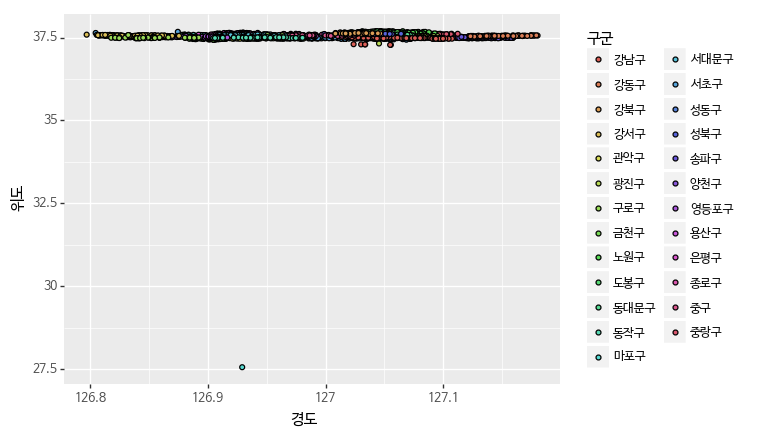

<ggplot: (119401676559)>

In [64]:
(ggplot(seoul)
 + aes(x='경도', y='위도', fill='구군')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [65]:

# 위 데이터에서는 송파, 서초, 양천, 강남구에 공원이 많은 것으로 보여집니다.
# 강남3구는 공원만 표시해 봅니다.
geo_df = seoul.loc[seoul['구군'].str.match( r'((강남|서초|송파)구)')]
geo_df = geo_df.loc[(geo_df['위도'].notnull()) & (geo_df['경도'].notnull())]
geo_df.isnull().sum()

관리번호        0
공원명         0
공원구분        0
소재지도로명주소    0
소재지지번주소     0
위도          0
경도          0
공원면적        0
공원면적비율      0
시도          0
군구          0
구군          0
dtype: int64

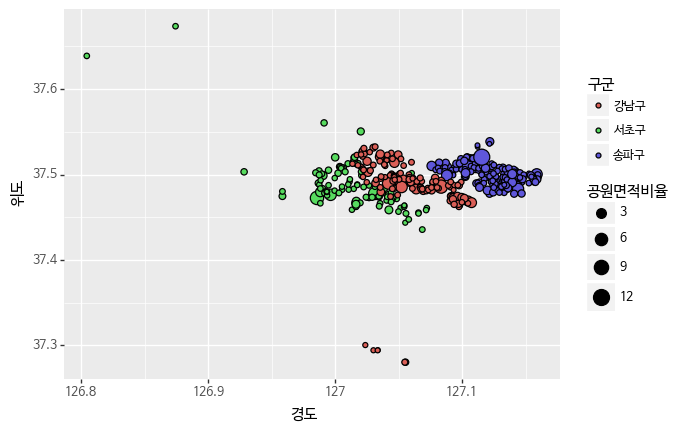

<ggplot: (-9223371917458895251)>

In [66]:
# 서초구 데이터에 잘못된 위경도 데이터가 보입니다. 
(ggplot(geo_df)
 + aes(x='경도', y='위도', fill='구군', size='공원면적비율')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [67]:
geo_df.shape

(406, 12)

In [68]:

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=13)

for n in geo_df.index:
    park_name = geo_df.loc[n, '공원명'] + ' - ' + geo_df.loc[n, '소재지도로명주소']
    folium.Marker([geo_df.loc[n, '위도'], geo_df.loc[n, '경도']], popup=park_name).add_to(map)
map

In [69]:
# 서울에는 주로 어떤 공원이 있을까?
seoul['공원구분'].value_counts()

어린이공원     1130
근린공원       346
소공원        187
기타          70
문화공원        20
역사공원        13
수변공원         4
도시농업공원       4
체육공원         4
묘지공원         1
Name: 공원구분, dtype: int64

In [70]:
# 경기도는 어떨까요?
gg['공원구분'].value_counts()

어린이공원     2064
근린공원       907
소공원        428
문화공원        90
체육공원        84
수변공원        59
역사공원        37
기타          17
묘지공원        10
도시자연공원       6
도시농업공원       1
Name: 공원구분, dtype: int64

In [71]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원면적비율', '시도', '군구', '구군'],
      dtype='object')

In [72]:
park_sq = seoul[['시도', '구군', '공원면적']]
park_sq.head()

,시도,구군,공원면적
15,서울특별시,종로구,710.0
16,서울특별시,종로구,860.0
17,서울특별시,종로구,5136.0
18,서울특별시,종로구,491328.0
19,서울특별시,종로구,3341.0


In [73]:
jeju = park[park['시도'] == '제주특별자치도']
jeju.shape

(246, 12)

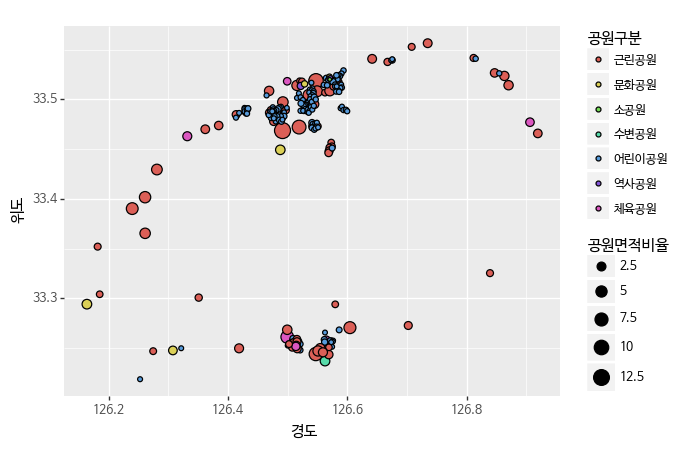

<ggplot: (119399620118)>

In [74]:
(ggplot(jeju)
 + aes(x='경도', y='위도', fill='공원구분', size='공원면적비율')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [76]:
pip install CircleMarker

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement CircleMarker (from versions: none)
ERROR: No matching distribution found for CircleMarker


In [77]:
geo_df = jeju

map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=10)

for n in geo_df.index:
    park_name = geo_df.loc[n, '공원명'] + ' - ' + geo_df.loc[n, '소재지도로명주소']
    icon_color = 'red'
    folium.features.CircleMarker(
        location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
        radius=geo_df.loc[n, '공원면적비율'],
        popup=park_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

AttributeError: module 'folium.features' has no attribute 'CircleMarker'